In [4]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
)

# 2. Load the Dataset
# Replace with the actual file path
df = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_encoded_dataset.csv")

In [5]:
# 3. Exploratory Data Analysis (EDA)
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 Rows of Dataset:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (569, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             569 non-null    float64
 1   texture            569 non-null    float64
 2   perimeter          569 non-null    float64
 3   area               569 non-null    float64
 4   smoothness         569 non-null    float64
 5   compactness        569 non-null    float64
 6   concavity          569 non-null    float64
 7   symmetry           569 non-null    float64
 8   Fractal_Dimension  569 non-null    float64
 9   diagnosis_encoded  569 non-null    int64  
 10  diagnosis_B        569 non-null    int64  
 11  diagnosis_M        569 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 53.5 KB
None

First 5 Rows of Dataset:
   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     1

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
Fractal_Dimension    0
diagnosis_encoded    0
diagnosis_B          0
diagnosis_M          0
dtype: int64


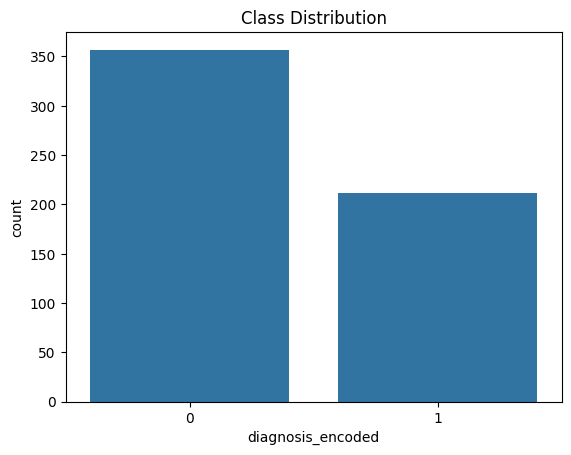

In [7]:
# Visualize class distribution
sns.countplot(x='diagnosis_encoded', data=df)
plt.title("Class Distribution")
plt.show()

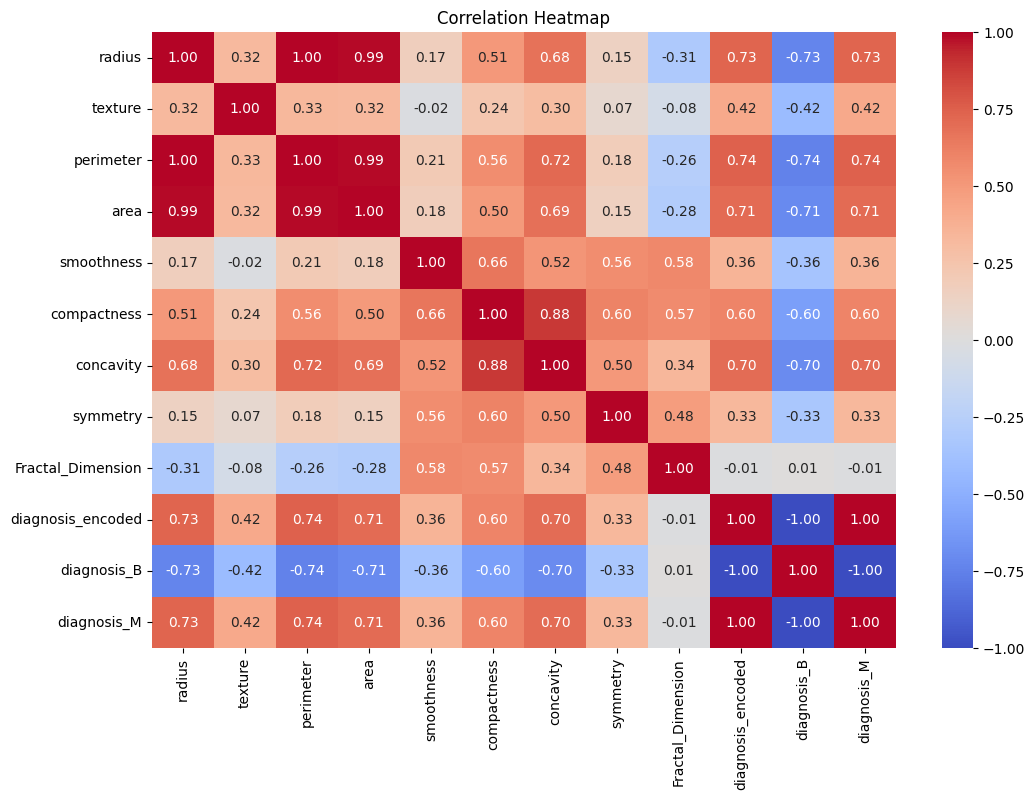

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


<Figure size 600x800 with 0 Axes>

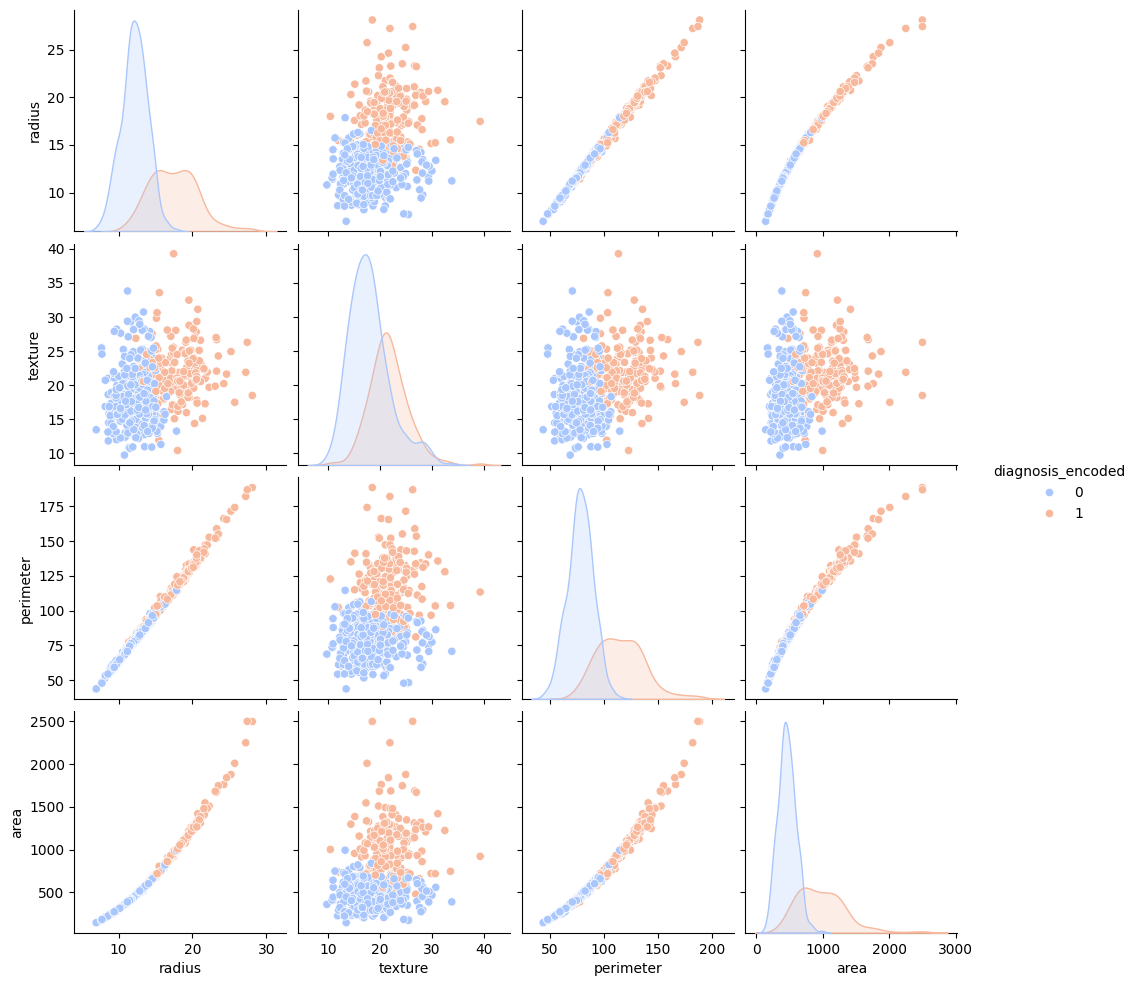

In [9]:
# Visualizing specific features using pairplot
features_to_plot = ['radius', 'texture', 'perimeter', 'area', 'diagnosis_encoded']
plt.figure(figsize=(6, 8))
sns.pairplot(df[features_to_plot], hue='diagnosis_encoded', palette='coolwarm')
plt.show()

In [10]:
# 4. Preprocessing: Separating Features and Target Variable
X = df.drop(['diagnosis_encoded', 'diagnosis_B', 'diagnosis_M'], axis=1)  # Features
y = df['diagnosis_encoded']  # Target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 5. Decision Tree Classifier with Gini Index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

# Predicting with Gini
y_pred_gini = dt_gini.predict(X_test)

# Gini Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"\nAccuracy with Gini Index: {accuracy_gini * 100:.2f}%")

# 6. Decision Tree Classifier with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Predicting with Entropy
y_pred_entropy = dt_entropy.predict(X_test)

# Entropy Accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"\nAccuracy with Entropy: {accuracy_entropy * 100:.2f}%\n")


Accuracy with Gini Index: 93.86%

Accuracy with Entropy: 94.74%



In [12]:
# 7. Confusion Matrix and Classification Report
# Gini
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("\nConfusion Matrix (Gini):")
print(cm_gini)
print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini))

# Entropy
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("\nConfusion Matrix (Entropy):")
print(cm_entropy)
print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))


Confusion Matrix (Gini):
[[67  4]
 [ 3 40]]

Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion Matrix (Entropy):
[[68  3]
 [ 3 40]]

Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [13]:
# 8. Precision, Recall, F-Score
# Gini
precision_gini, recall_gini, fscore_gini, _ = precision_recall_fscore_support(y_test, y_pred_gini, average='binary')
print(f"\nPrecision (Gini): {precision_gini:.2f}")
print(f"Recall (Gini): {recall_gini:.2f}")
print(f"F-Score (Gini): {fscore_gini:.2f}")

# Entropy
precision_entropy, recall_entropy, fscore_entropy, _ = precision_recall_fscore_support(y_test, y_pred_entropy, average='binary')
print(f"\nPrecision (Entropy): {precision_entropy:.2f}")
print(f"Recall (Entropy): {recall_entropy:.2f}")
print(f"F-Score (Entropy): {fscore_entropy:.2f}")


Precision (Gini): 0.91
Recall (Gini): 0.93
F-Score (Gini): 0.92

Precision (Entropy): 0.93
Recall (Entropy): 0.93
F-Score (Entropy): 0.93


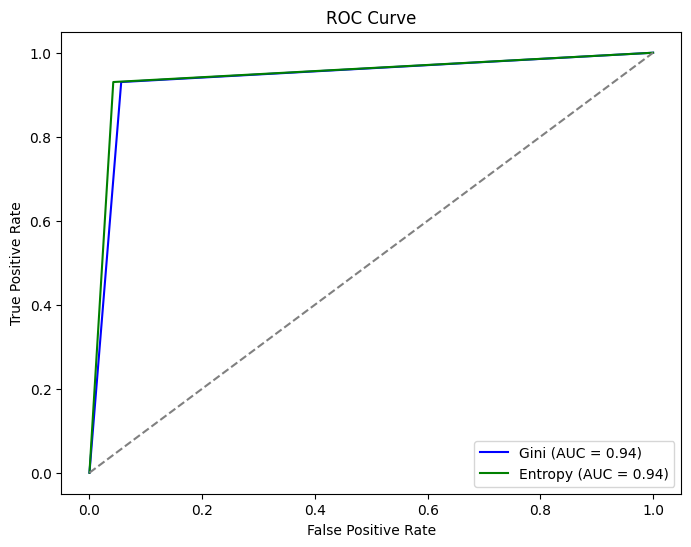

In [14]:
# 9. ROC Curve and AUC
# Gini
fpr_gini, tpr_gini, _ = roc_curve(y_test, dt_gini.predict_proba(X_test)[:, 1])
roc_auc_gini = auc(fpr_gini, tpr_gini)

# Entropy
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, dt_entropy.predict_proba(X_test)[:, 1])
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gini, tpr_gini, color='blue', label=f'Gini (AUC = {roc_auc_gini:.2f})')
plt.plot(fpr_entropy, tpr_entropy, color='green', label=f'Entropy (AUC = {roc_auc_entropy:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

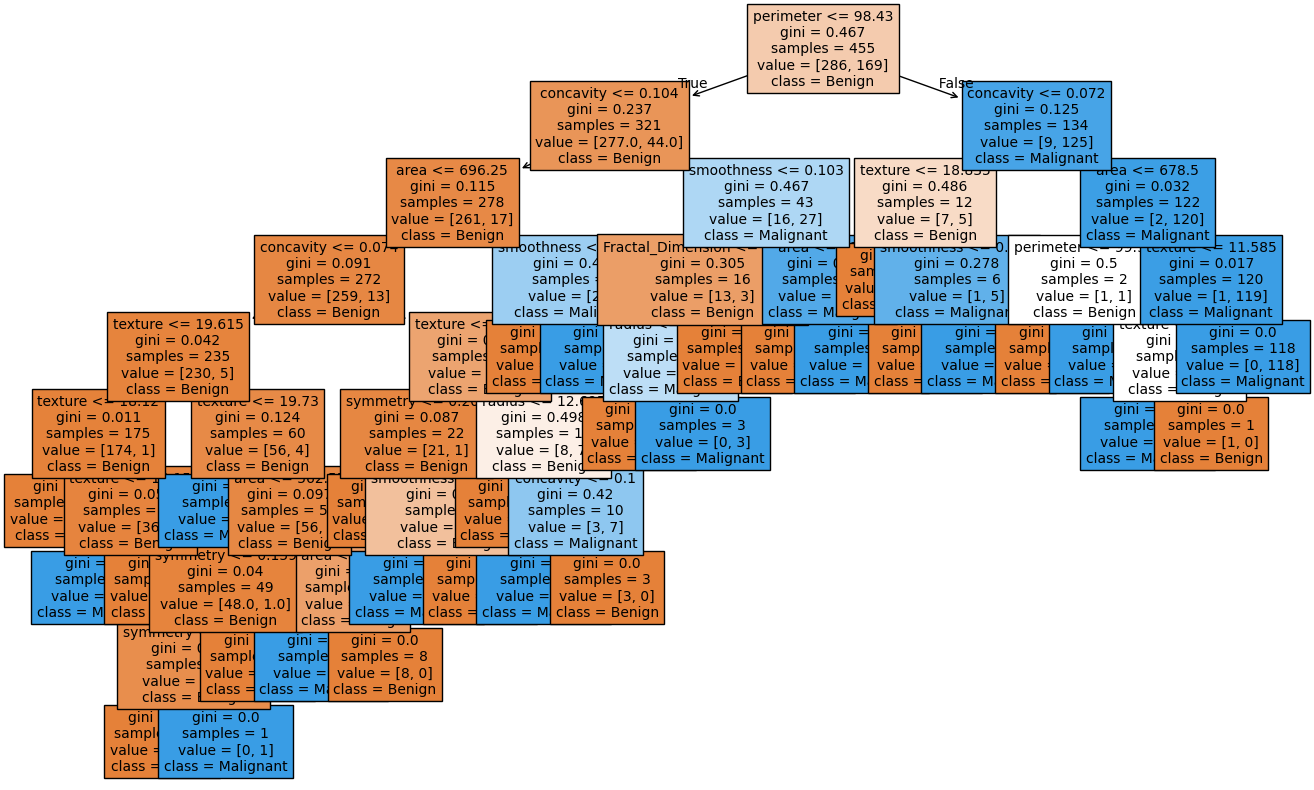

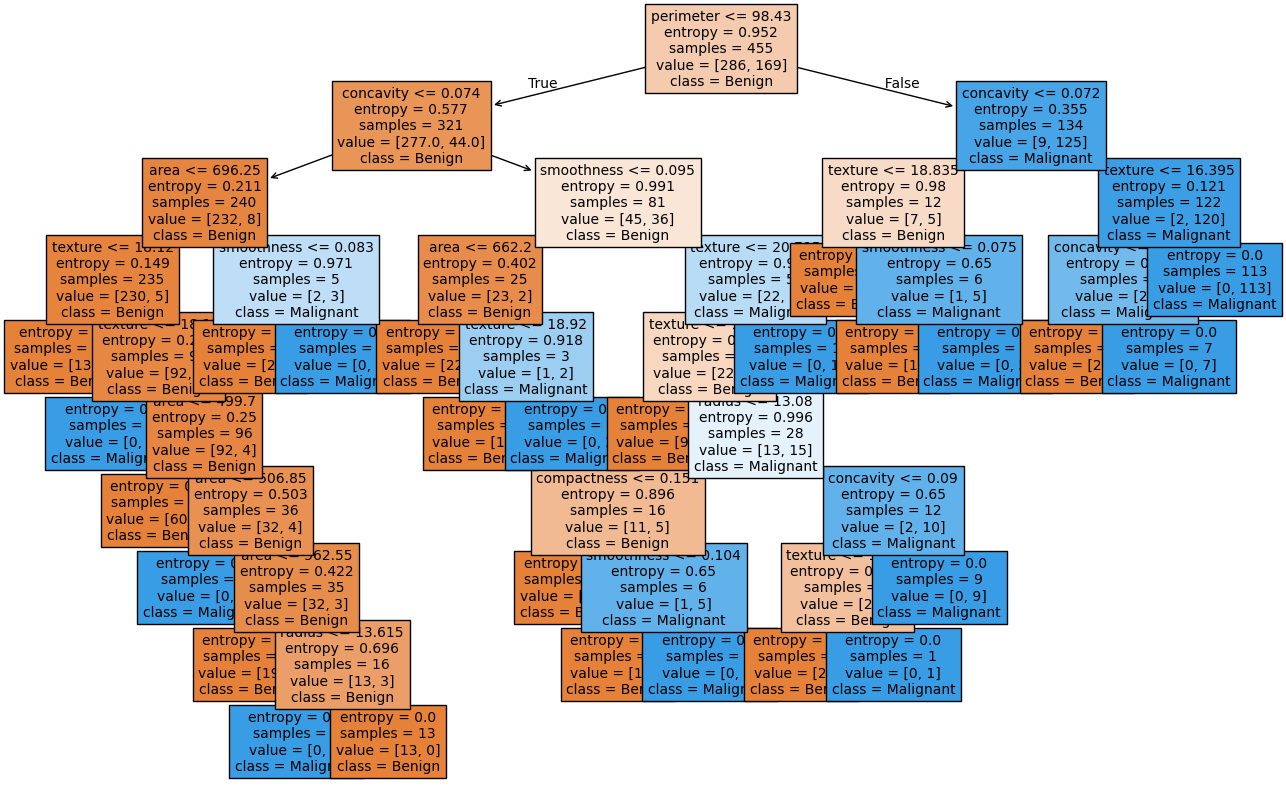

In [15]:
# 10. Visualization of Decision Trees
plt.figure(figsize=(16, 10))
plt.title("Decision Tree with Gini Index")
plot_tree(dt_gini, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10)
plt.show()

plt.figure(figsize=(16, 10))
plt.title("Decision Tree with Entropy")
plot_tree(dt_entropy, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10)
plt.show()

In [16]:
# Critical Features:
# Features like perimeter, texture, and concavity are most important for distinguishing
# between benign and malignant tumors in this dataset.

# Key Decision Points:
# The tree provides thresholds (e.g., perimeter <= 98.43, area <= 696.25) that offer
# valuable insights. These thresholds can help identify potential malignancies
# based on tumor characteristics.

# Interpretability:
# The decision tree makes predictions in a step-by-step, logical way. This makes
# it easy to explain why a particular tumor is classified as benign or malignant.

# Performance:
# Based on metrics like accuracy, precision, and recall, the decision tree performs
# well. It identifies most tumors correctly with very few misclassifications.

In [17]:
# This decision tree effectively identifies critical features and thresholds for classifying tumors into benign and malignant categories.
# The tree highlights important features such as perimeter, concavity, and area, which play a key role in decision-making.
# It can be further improved by applying pruning techniques or using cross-validation to reduce overfitting and enhance generalization.
# The insights derived from this tree can be utilized in medical diagnostics to assist in identifying potential malignancies.

Pre-Pruned Tree Accuracy: 0.9385964912280702


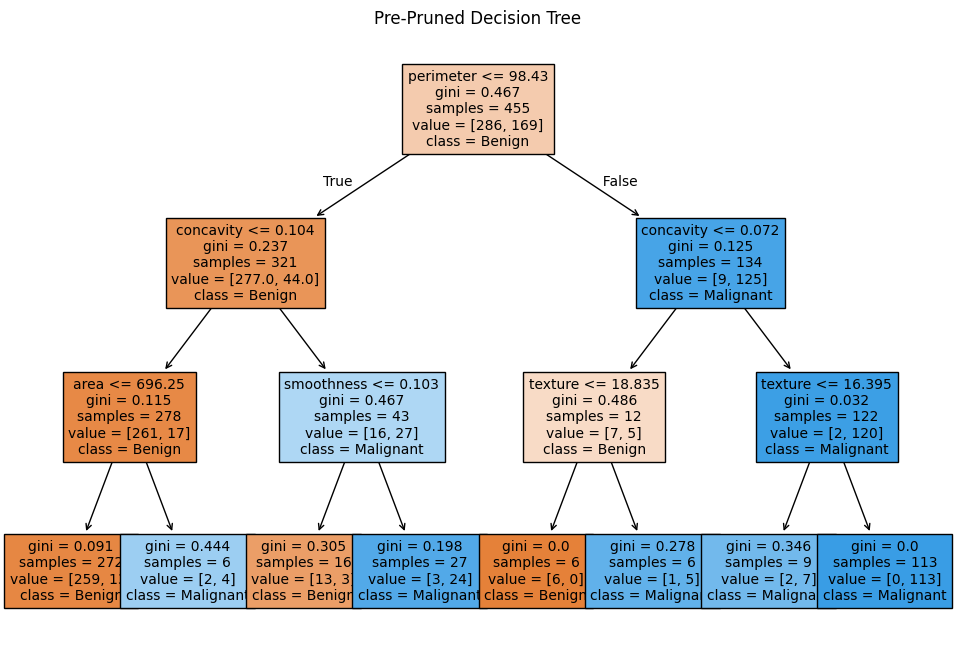

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = df.drop(['diagnosis_encoded', 'diagnosis_B', 'diagnosis_M'], axis=1)  # Features
y = df['diagnosis_encoded']  # Target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pre-pruning using constraints
pre_pruned_tree = DecisionTreeClassifier(
    max_depth=3,          # Limit the depth of the tree
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=3,   # Minimum samples required to be a leaf node
    random_state=42
)

# Fit the model
pre_pruned_tree.fit(X_train, y_train)

# Evaluate
y_pred = pre_pruned_tree.predict(X_test)
print("Pre-Pruned Tree Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the pre-pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(pre_pruned_tree, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10)
plt.title("Pre-Pruned Decision Tree")
plt.show()

Post-Pruned Tree Accuracy: 0.9473684210526315


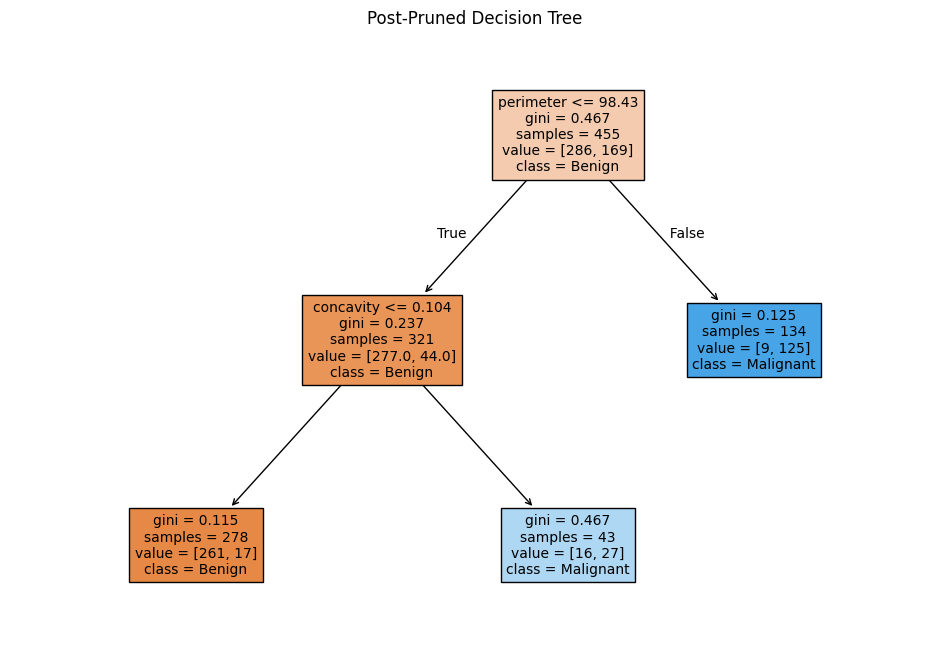

In [20]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Train an unpruned decision tree
unpruned_tree = DecisionTreeClassifier(random_state=42)
unpruned_tree.fit(X_train, y_train)

# Get effective alphas for cost complexity pruning
path = unpruned_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Array of alpha values

# Train trees for each alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate each pruned tree
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Select the best tree (highest test accuracy)
best_alpha = ccp_alphas[np.argmax(test_scores)]
best_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_tree.fit(X_train, y_train)

print("Post-Pruned Tree Accuracy:", best_tree.score(X_test, y_test))

# Visualize the post-pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10)
plt.title("Post-Pruned Decision Tree")
plt.show()
